<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/blob/master/6.%20Employment%20and%20Workforce/Employee%20Attrition/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Content
1. [Preparing Project](#1)
    * 1.1 [Connecting To Kaggle](#1.1)
    * 1.2 [Download Dataset](#1.2)
    * 1.3 [Import Libraries](#1.3)
    * 1.4 [Importing Dataset](#1.4)
2. [Exploring Dataset](#2)
    * 2.1 [Understanding Variables](#2.1)
    * 2.2 [Data Types](#2.2)
    * 2.3 [Missing Values](#2.3)
    * 2.4 [Statistical Summary](#2.4)
    * 2.5 [Drop Columns](#2.5)
3. [EDA](#3)
    * 3.1 [Distribution](#3.1)
    * 3.2 [Countplot](#3.2)
    * 3.3 [Comparison](#3.3)
    * 3.4 [Correlation](#3.4)
4. [Preprocessing And Preparing DataFrame for Modelling](#4)
    * 4.1 [Dealing With Categorical Features](#4.1)
    * 4.2 [Splitting X, y](#4.2)
    * 4.3 [Defining Train & Test Set](#4.3)
    * 4.4 [Feature Scaling]
5. [ML Models](#5)
    * 5.1 [Logistic Regression](#5.1)
    * 5.2 [RandomForest Classifier](#5.2)
    * 5.3 [SVM](#5.3)
    * 5.4 [Hyperparameter Search](#5.4)
    * 5.5 [Final Model (LogisticRegression)](#5.5)
    


[Dataset Link](https://www.kaggle.com/datasets/patelprashant/employee-attrition/code)

# 1. Preparing Project

## 1.1 Connecting To Kaggle

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_PASS"] = userdata.get('KAGGLE_PASS')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

## 1.2 Download Dataset <a id=1.2></a>

In [ ]:
!kaggle datasets download -d patelprashant/employee-attrition

Dataset URL: https://www.kaggle.com/datasets/patelprashant/employee-attrition
License(s): other
  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 52.5MB/s]


In [ ]:
!unzip '/content/employee-attrition.zip'

Archive:  /content/employee-attrition.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


## 1.3 Importing Libraries <a id=1.3></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1.4 Importing Dataset <a id=1.4></a>

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 2. Exploring Dataset <a id=2></a>

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## 2.1 Understanding Variables <a id=2.1></a>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 2.2 Data Types <a id=2.2></a>

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
pd.DataFrame(df.select_dtypes(include='object').nunique(), columns=['Count'])

,Count
Attrition,2
BusinessTravel,3
Department,3
EducationField,6
Gender,2
JobRole,9
MaritalStatus,3
Over18,1
OverTime,2


In [ ]:
df.select_dtypes(include='number').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
pd.DataFrame(df.select_dtypes(include='number').nunique(), columns=['Count'])

,Count
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EmployeeCount,1
EmployeeNumber,1470
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4
JobLevel,5


## 2.3 Missing Values <a id=2.3></a>

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## 2.4 Statistical Summary <a id=2.4></a>

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## 2.5 Drop Columns <a id=2.5></a>

In [ ]:
df = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])
df.shape

(1470, 31)

In [ ]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


# 3. EDA <a id=3></a>

## 3.1 Distribution <a id=3.1></a>

In [ ]:
def hist(col, bins='auto'):
    plt.figure(figsize=(5,5))
    sns.set_style('darkgrid')
    sns.histplot(data=df, x=col, palette='Blues_r', kde=True, bins=bins)
    plt.title(f'Distribution of {col}', fontdict={'weight': 'bold', 'color':'darkred', 'size':12})
    plt.xlabel(col, fontdict={'weight': 'bold', 'color':'darkred', 'size':10})
    plt.ylabel('Count', fontdict={'weight': 'bold', 'color':'darkred', 'size':10})
    plt.show()

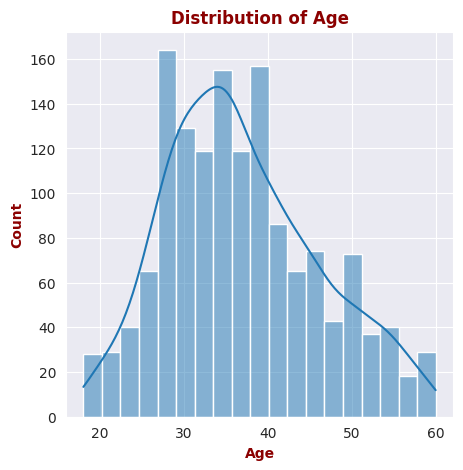

In [ ]:
hist('Age')

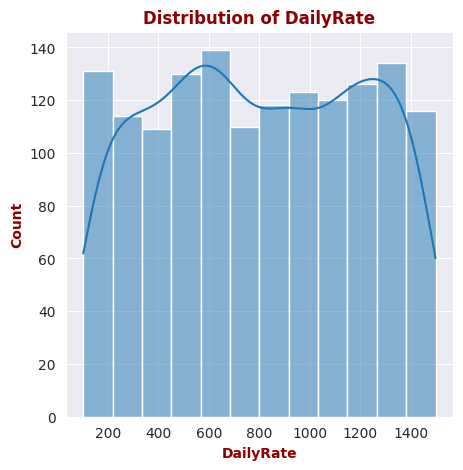

In [ ]:
hist('DailyRate')

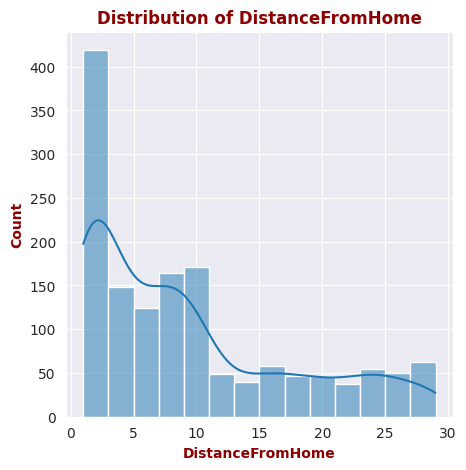

In [ ]:
hist('DistanceFromHome')

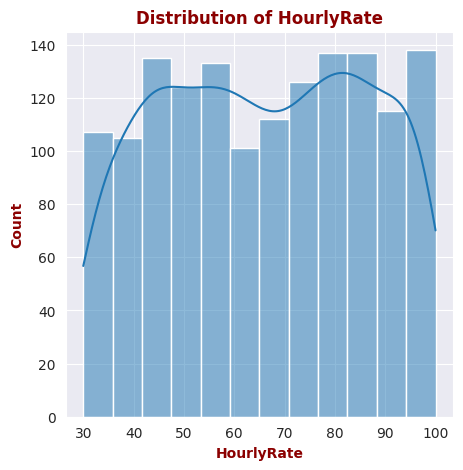

In [ ]:
hist('HourlyRate')

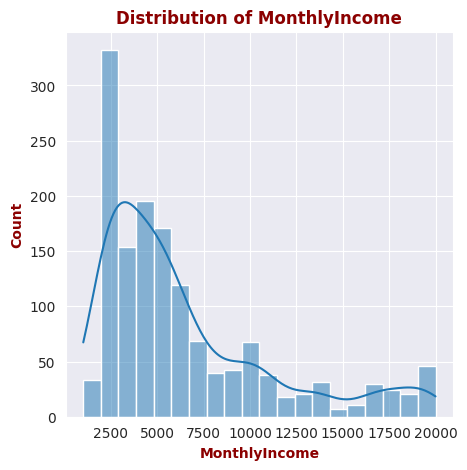

In [ ]:
hist('MonthlyIncome')

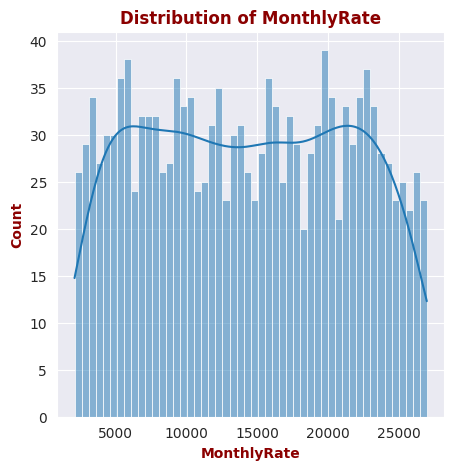

In [ ]:
hist('MonthlyRate', bins=50)

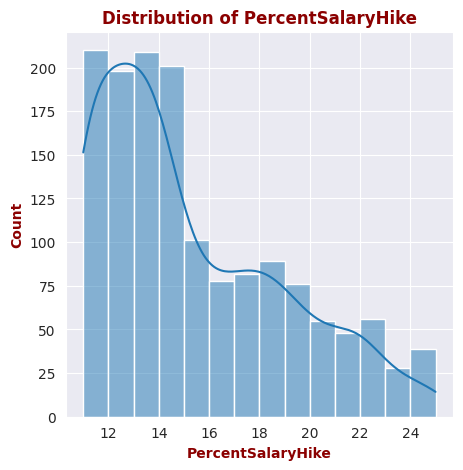

In [ ]:
hist('PercentSalaryHike')

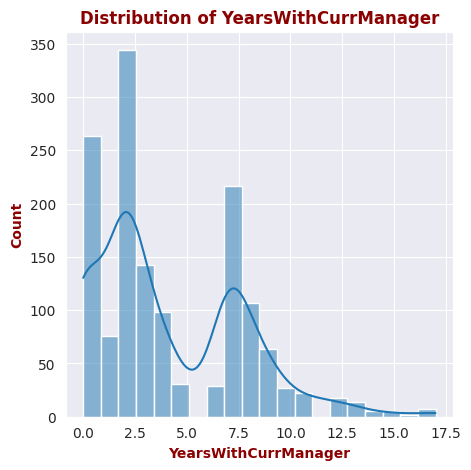

In [ ]:
hist('YearsWithCurrManager')

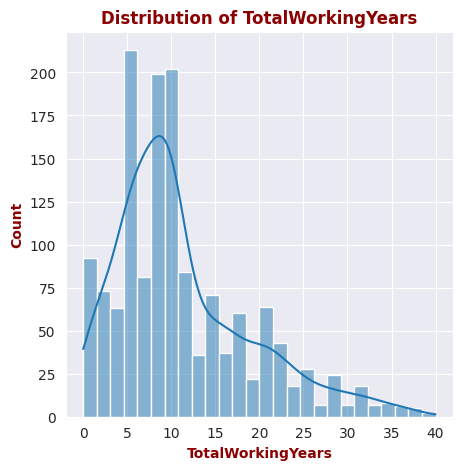

In [ ]:
hist('TotalWorkingYears')

## 3.2 Countplot <a id=3.2></a>

In [ ]:
def count(col):
    plt.figure(figsize=(5, 5))
    sns.set_style('darkgrid')
    sns.countplot(data=df, x=col, palette='Blues_r', order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}',  fontdict={'weight': 'bold', 'color':'darkred', 'size':12})
    plt.xlabel(col,  fontdict={'weight': 'bold', 'color':'darkred', 'size':10})
    plt.ylabel('Count',  fontdict={'weight': 'bold', 'color':'darkred', 'size':10})
    plt.show()

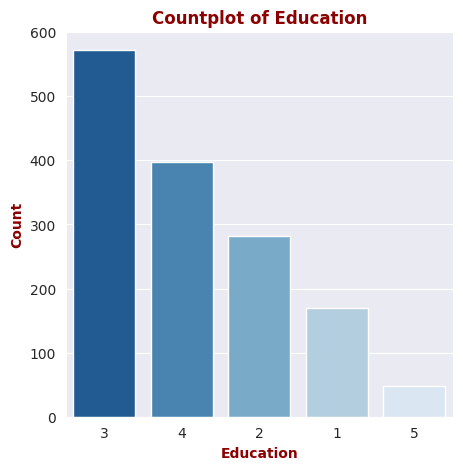

In [ ]:
count('Education')

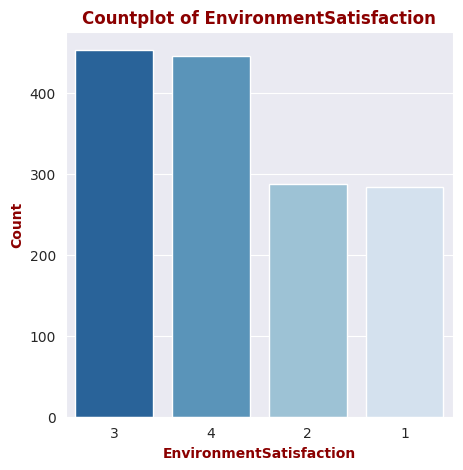

In [ ]:
count('EnvironmentSatisfaction')

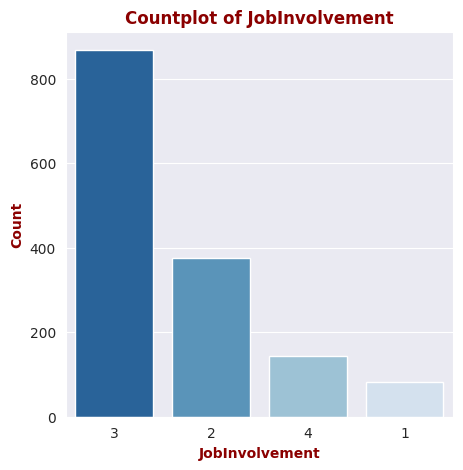

In [ ]:
count('JobInvolvement')

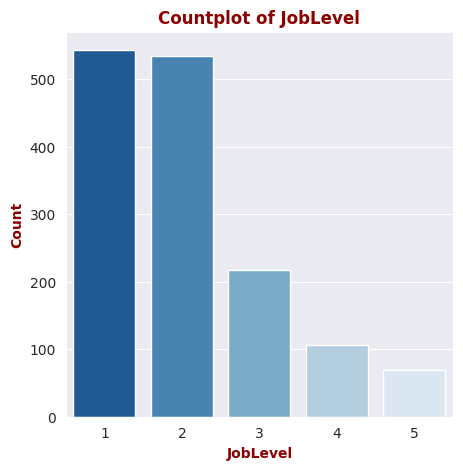

In [ ]:
count('JobLevel')

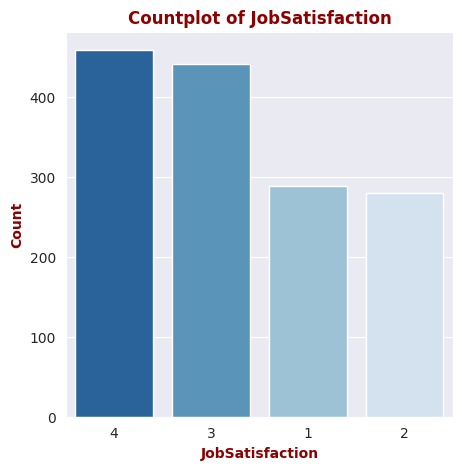

In [ ]:
count('JobSatisfaction')

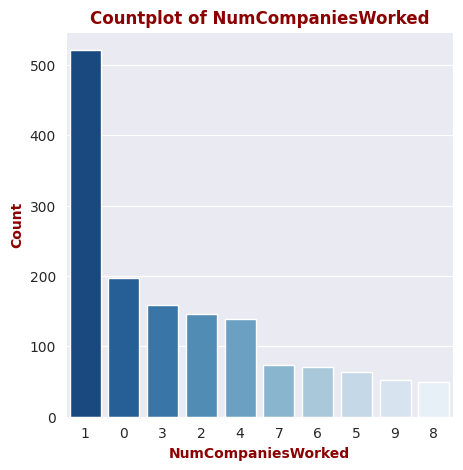

In [ ]:
count('NumCompaniesWorked')

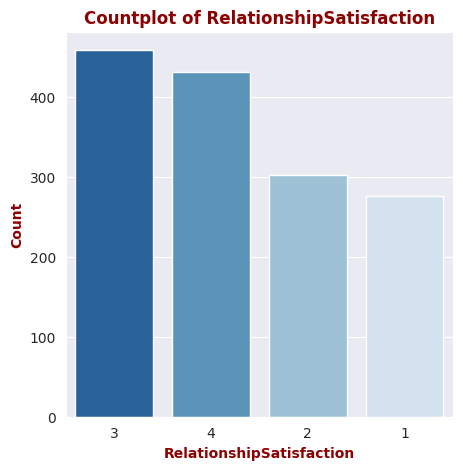

In [ ]:
count('RelationshipSatisfaction')

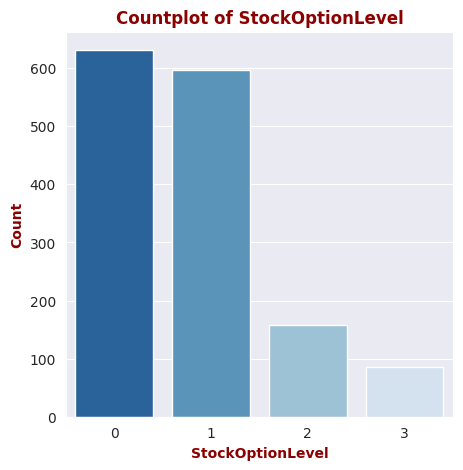

In [ ]:
count('StockOptionLevel')

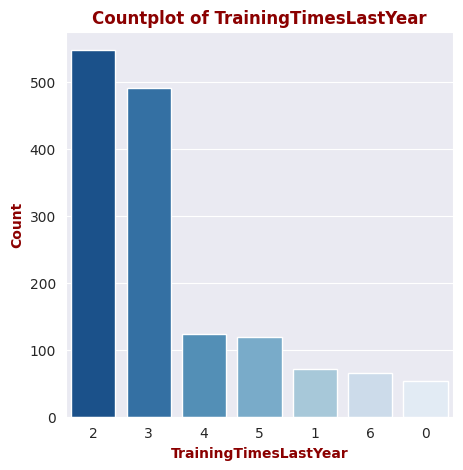

In [ ]:
count('TrainingTimesLastYear')

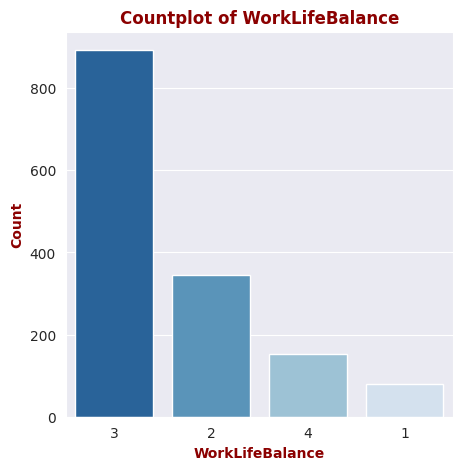

In [ ]:
count('WorkLifeBalance')

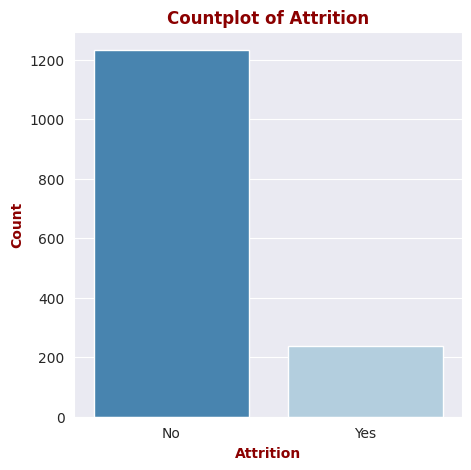

In [ ]:
count('Attrition')

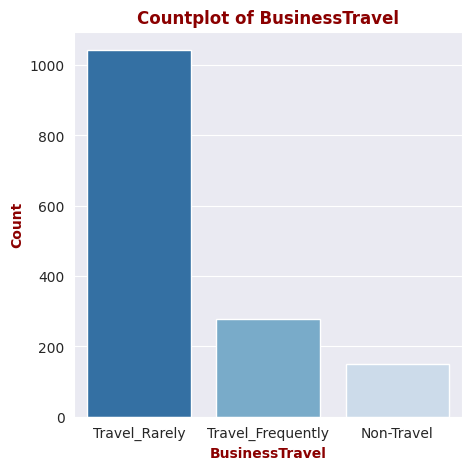

In [ ]:
count('BusinessTravel')

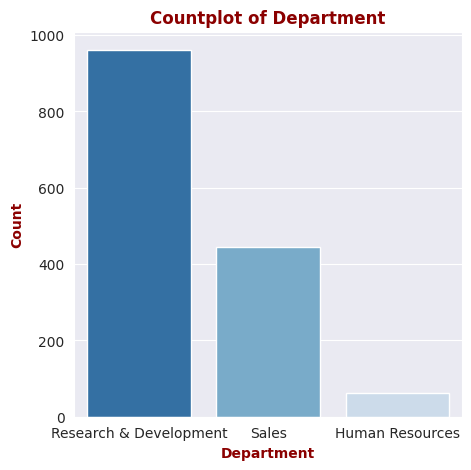

In [ ]:
count('Department')

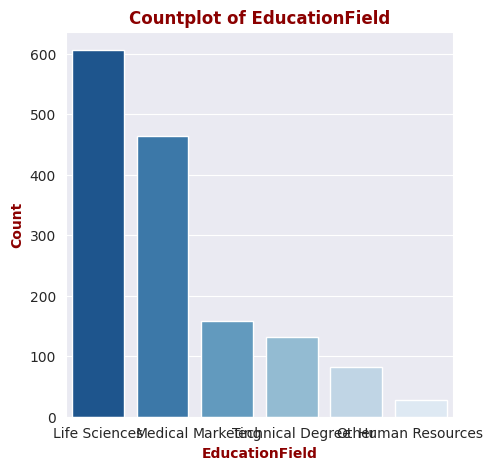

In [ ]:
count('EducationField')

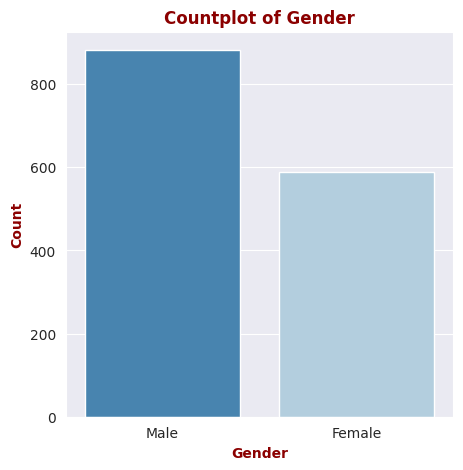

In [ ]:
count('Gender')

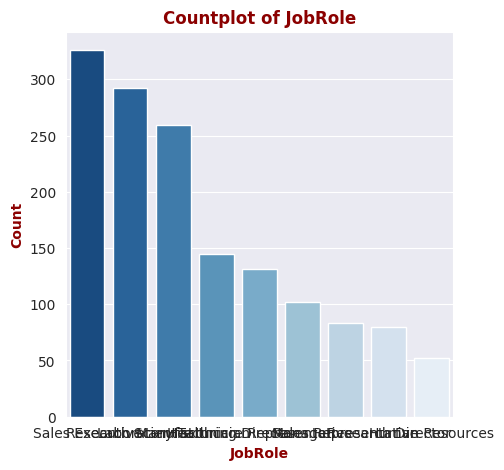

In [ ]:
count('JobRole')

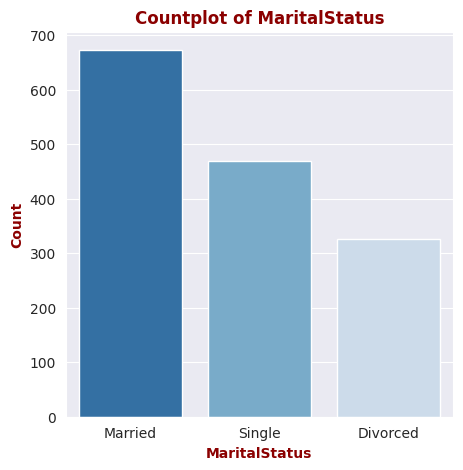

In [ ]:
count('MaritalStatus')

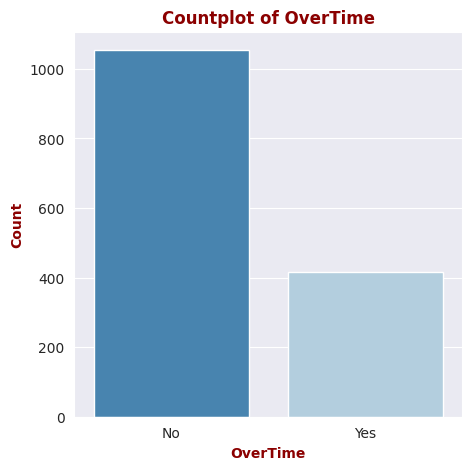

In [ ]:
count('OverTime')

## 3.3 `Attrition` Comparison <a id=3.3></a>

Text(0.5, 1.0, 'JobSatisfaction Vs Attrition')

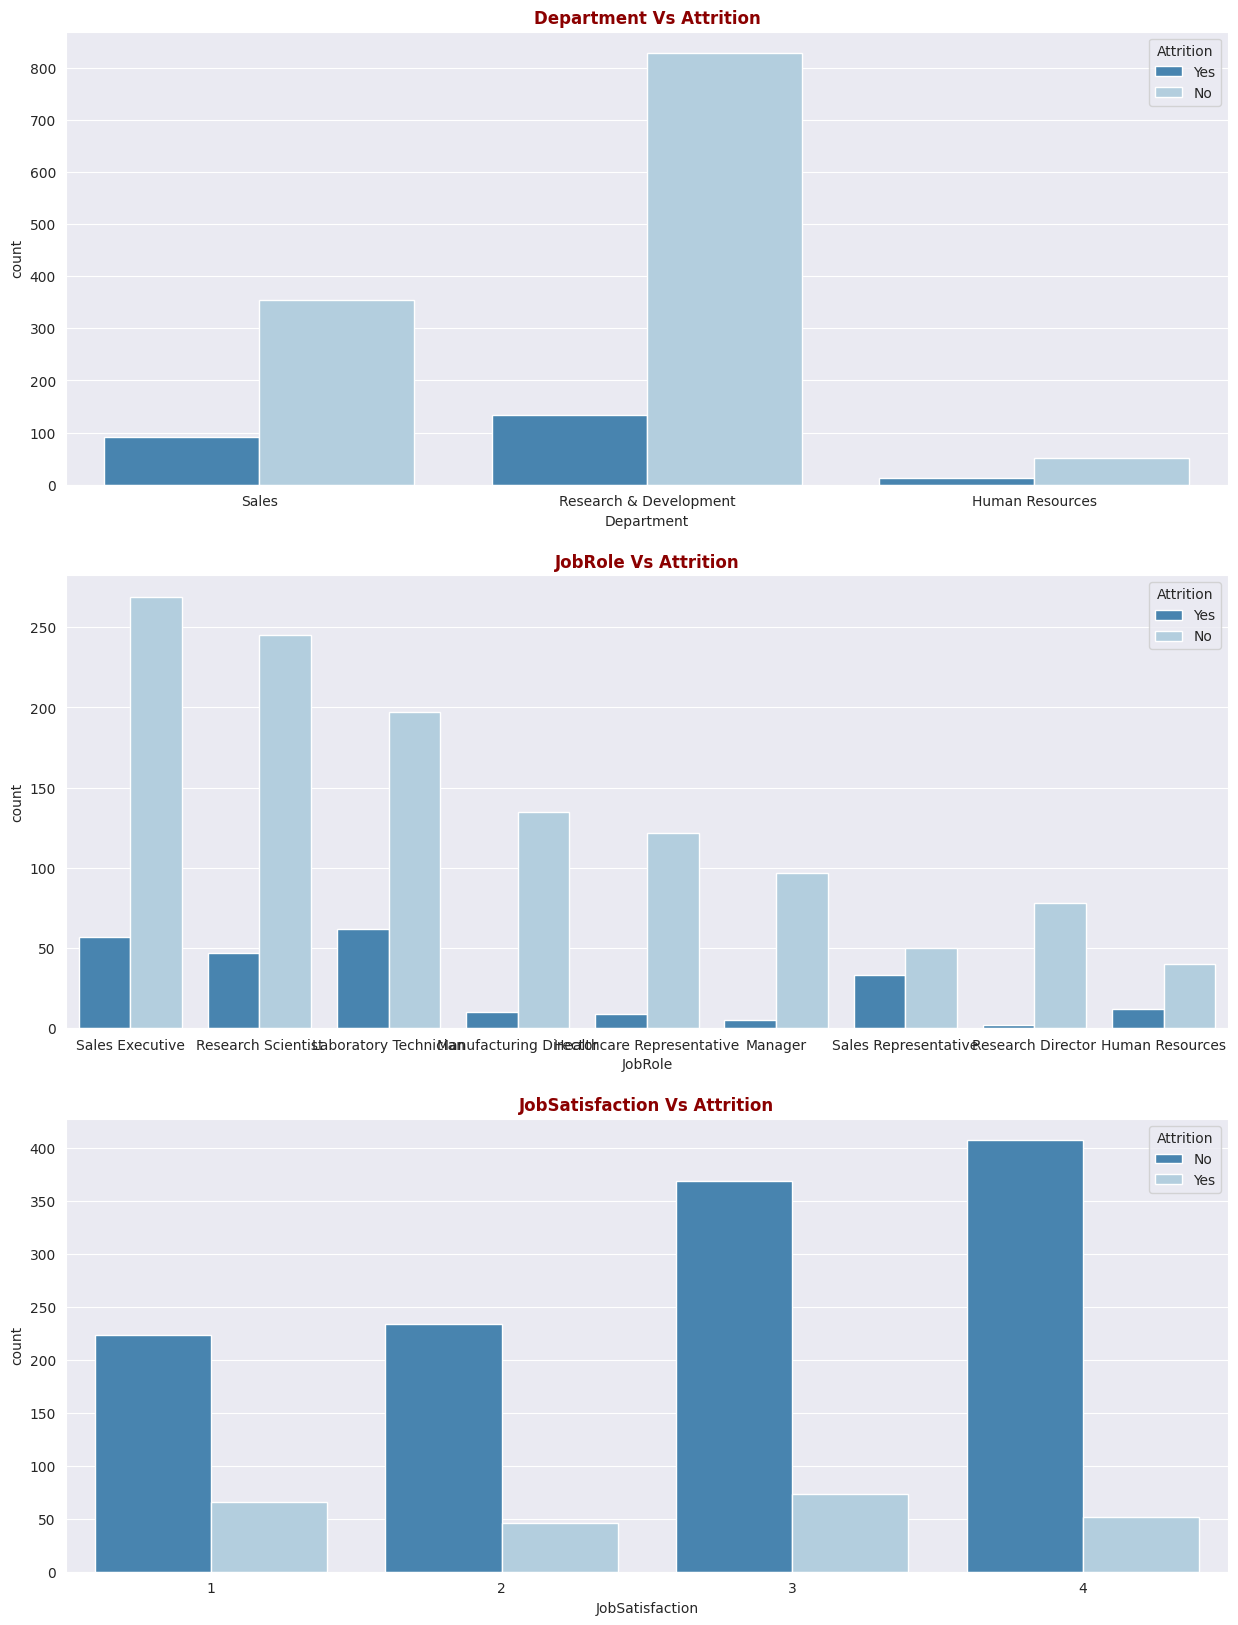

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(311)
sns.countplot(x='Department', hue='Attrition', data=df, palette='Blues_r')
plt.title("Department Vs Attrition", fontdict={'weight': 'bold', 'color':'darkred', 'size':12})

plt.subplot(312)
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='Blues_r')
plt.title("JobRole Vs Attrition", fontdict={'weight': 'bold', 'color':'darkred', 'size':12})

plt.subplot(313)
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='Blues_r')
plt.title("JobSatisfaction Vs Attrition", fontdict={'weight': 'bold', 'color':'darkred', 'size':12})


## 3.4 Correlation <a id=3.4></a>

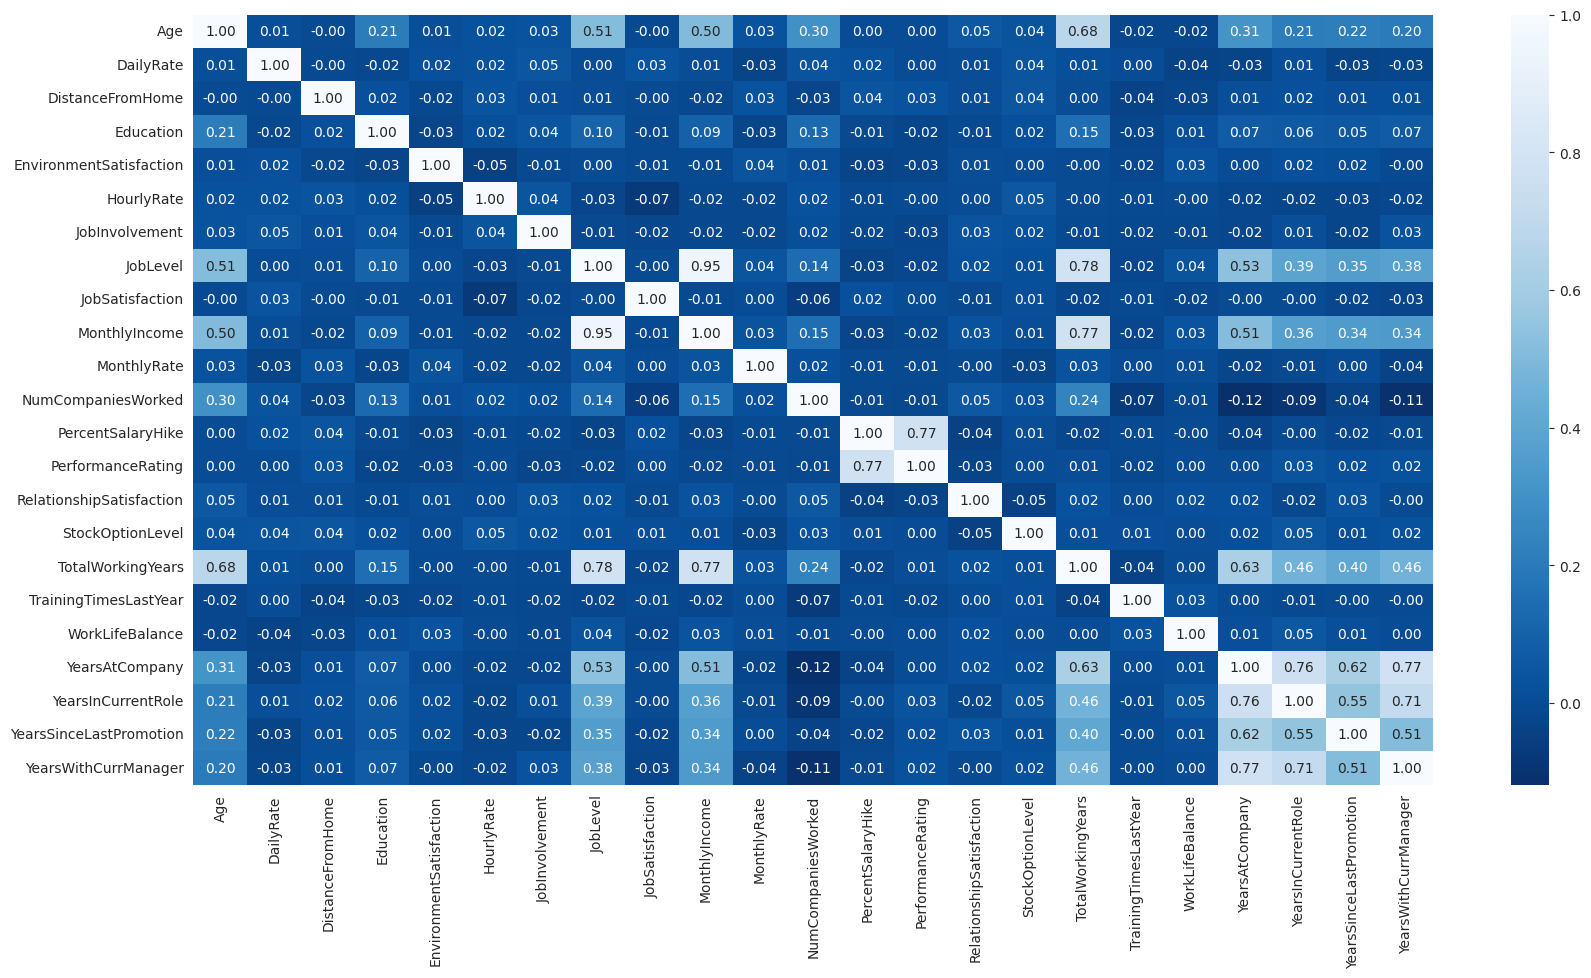

In [ ]:
df_corr = df.corr(numeric_only=True)

plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='Blues_r')
plt.show()

# 4. Preprocessing And Preparing DataFrame for Modelling <a id=4></a>

## 4.1 Dealing With Categorical Features <a id-4.1></a>

In [ ]:
# Categorical features
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

encoded_cols = encoder.fit_transform(df[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime']])

In [ ]:
encoded_cols = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime']))
encoded_cols

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df_encoded = pd.concat([df, encoded_cols], axis=1)
df_encoded.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'], axis=1, inplace=True)
df_encoded.head(1)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
# Correcting Target Variable Name
df_encoded.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   Education                          1470 non-null   int64  
 4   EnvironmentSatisfaction            1470 non-null   int64  
 5   HourlyRate                         1470 non-null   int64  
 6   JobInvolvement                     1470 non-null   int64  
 7   JobLevel                           1470 non-null   int64  
 8   JobSatisfaction                    1470 non-null   int64  
 9   MonthlyIncome                      1470 non-null   int64  
 10  MonthlyRate                        1470 non-null   int64  
 11  NumCompaniesWorked                 1470 non-null   int64

## 4.2 Splitting X, y <a id=4.2></a>

In [ ]:
X = df_encoded.drop('Attrition', axis=1).values
y = df_encoded['Attrition'].values


print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (1470, 44)
y shape:  (1470,)


## 4.3 Defining Train & Test Sets <a id=4.2></a>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1176, 44)
X_test Shape:  (294, 44)
y_train Shape:  (1176,)
y_test Shape:  (294,)


## 4.4 Feature Scaling <a id=4.4></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# 5. ML Models <a id=5></a>

## 5.1 LogisticRegression <a id=5.1></a>

In [ ]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression Instance
classifier_lr = LogisticRegression()
# Fiting
classifier_lr.fit(X_train, y_train)
# Prediction on Test Set
y_pred_lr = classifier_lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_lr)
print(acc*100)

83.6734693877551


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_lr))

[[245   0]
 [ 48   1]]


## 5.2 RandomForest Classifier <a id=5.2></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=0)
# Fiting
classifier_rf.fit(X_train, y_train)
# Prediction on Test Set
y_pred_rf = classifier_rf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred_rf)
print(acc*100)

86.05442176870748


In [ ]:
print(confusion_matrix(y_test, y_pred_rf))

[[244   1]
 [ 40   9]]


## 5.3 SVM <a id=5.3></a>

In [ ]:
from sklearn.svm import SVC

classifier_svc = SVC(random_state=0)
# Fiting
classifier_svc.fit(X_train, y_train)
# Prediction on Test Set
y_pred_svm = classifier_svc.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred_svm)
print(acc*100)
print(confusion_matrix(y_test, y_pred_svm))

83.33333333333334
[[245   0]
 [ 49   0]]


## 5.4 Hyperparameter Search <a id=5.4></a>
_Performing Hyperparameter Optimization On LogisticRegression Model_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

lr_tuned = LogisticRegression()

params = {
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 175, 2.0],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[50, 100, 500, 2000, 5000]
}

random_cv = RandomizedSearchCV(estimator=lr_tuned, param_distributions=params, n_iter=10, scoring='roc_auc',
                               n_jobs=-1, cv=5, verbose=3)

random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              175, 2.0],
                                        'max_iter': [50, 100, 500, 2000, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [ ]:
best_estimator = random_cv.best_estimator_
best_params = random_cv.best_params_
best_score = random_cv.best_score_

print("Best Estimator: ", best_estimator)
print("\nBest Params: ", best_params)
print("\nBest Score: ", best_score)

Best Estimator:  LogisticRegression(C=0.25, max_iter=2000, penalty='none', solver='newton-cg')

Best Params:  {'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 2000, 'C': 0.25}

Best Score:  0.8142097298522625


## 5.5 Final Model (LogisticRegression) <a id=5.5></a>

In [ ]:
classifer = LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
classifer.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=2000, random_state=0, solver='sag')

In [ ]:
y_pred = classifer.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print(acc*100)
cm = confusion_matrix(y_test, y_pred)
print(cm)

83.33333333333334
[[245   0]
 [ 49   0]]
